<a href="https://colab.research.google.com/github/andrewwgordon/perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        # Learning rate / gradient
        self.lr = learning_rate
        # No. of iterations / epochs
        self.n_iters = n_iters
        # Set the activation function to unit step
        self.activation_func = self._unit_step_func
        # Weights of the perceptron
        self.weights = None
        # Bias (slope in linearly seperable)
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Validate target class is binary
        y_ = np.array([1 if i > 0 else 0 for i in y])

        # For each iteration / epoch
        for _ in range(self.n_iters):

            # For each data point
            for idx, x_i in enumerate(X):

                # Set the transfer function
                transfer_func = np.dot(x_i, self.weights) + self.bias

                # Get the current prediction
                y_predicted = self.activation_func(transfer_func)

                # Perceptron update rule based on learning rate * distance
                update = self.lr * (y_[idx] - y_predicted)

                # Update the weight and bias of the model
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        # Set the transfer function
        transfer_func = np.dot(X, self.weights) + self.bias
        # Get the predicted value from the model
        y_predicted = self.activation_func(transfer_func)
        # Return the prediction
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [ ]:
# Create a dataset with two features with data clustered around two centres distributed over
# a standard deviation of 1.05
X, y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)
# Split a training and test set 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
# Preview the feature data
X[:5]

array([[ -0.53278301,  -1.64847081],
       [ -0.55022637, -11.61661524],
       [  1.38862276,  -1.4358059 ],
       [  1.37033956,  -0.64022071],
       [ -0.88060639,  -9.7094674 ]])

In [ ]:
# Preview the target class
y[:5]

array([1, 0, 1, 1, 0])

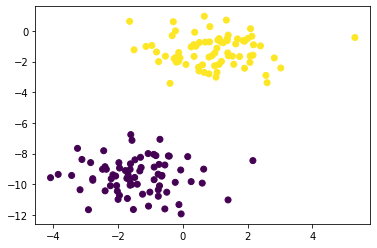

In [ ]:
# Plot a scatter diagram of the data showing the two classes
plt.scatter(X[:,0], X[:,1],marker='o',c=y)

Perceptron classification accuracy 1.0


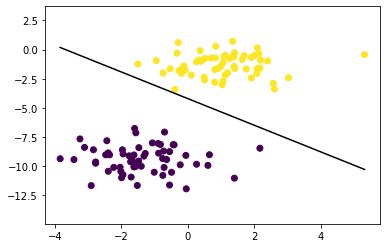

In [ ]:
# Function to return the accuracy of a prediction
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


# Initialise the Perceptron with a 1000 epochs
p = Perceptron(learning_rate=0.01, n_iters=1000)
# Run the the model against the training data
p.fit(X_train, y_train)
# Get the predictions from the model on the test data
predictions = p.predict(X_test)

# Show the accuracy
print("Perceptron classification accuracy", accuracy(y_test, predictions))

# Define a figure for a plot
fig = plt.figure()
# Add a subplot
ax = fig.add_subplot(1,1,1)
# Scatter diagram of the training data
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

# Get the x axis limits of the training data
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

# Extract the weights and bias from the Perceptron model
x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

# Plot the seperation, linear seperable
ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

# Get the y axis limits of the training data
ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

# Show the plot
plt.show()